In [8]:
import numpy

# This project is extended and a library called PyGAD is released to build the genetic algorithm.
# PyGAD documentation: https://pygad.readthedocs.io
# Install PyGAD: pip install pygad
# PyGAD source code at GitHub: https://github.com/ahmedfgad/GeneticAlgorithmPython

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

In [10]:
import numpy
import pygad as ga

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = 6

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

num_generations = 5
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness,
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

[[-1.10631316  3.83118726  3.34001538  2.61251061 -3.16339117  3.76351997]
 [ 2.32553716 -1.25689059  0.20448109  1.30479094 -3.74832839 -0.94397843]
 [-0.80653509  0.1236398  -2.29106748  1.46590501  0.78119166 -1.54738862]
 [-1.00293988  3.02447595 -1.07826896  1.30078917 -2.39693757  0.40493727]
 [ 1.74221872  1.17183203 -2.60535226 -3.47376576  3.28241984  2.82820951]
 [ 2.25337725  2.53923797 -1.3291639  -2.76888453 -2.90282109 -2.78027393]
 [ 0.95857135 -2.71962885  1.7410938  -0.23934586  0.81363014  3.50950613]
 [-0.02023454 -2.05542797 -2.36107973  1.194198    3.23837943  3.72684319]]
Generation :  0
Best result :  64.72387932869066
Generation :  1
Best result :  64.72387932869066
Generation :  2
Best result :  64.72387932869066
Generation :  3
Best result :  73.37307941696736
Generation :  4
Best result :  82.54106319684495
Best solution :  [[[ 2.32553716 -1.25689059  0.20448109  1.30479094 -5.36807238
   -0.94397843]]]
Best solution fitness :  [82.5410632]


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

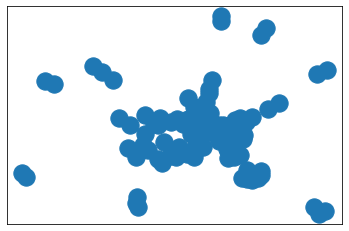

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#create a graph with degrees following a power law distribution

#I believe we can eliminate this loop to find s by using the call
#nx.utils.create_degree_sequence(100,powerlaw_sequence) with
#appropriate modification
while True:
    s=[]
    while len(s)<100:
        nextval = int(nx.utils.powerlaw_sequence(1, 2.5)[0]) #100 nodes, power-law exponent 2.5
        if nextval!=0:
            s.append(nextval)
    if sum(s)%2 == 0:
        break
G = nx.configuration_model(s)
G=nx.Graph(G) # remove parallel edges
G.remove_edges_from(G.selfloop_edges())

#draw and show graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.savefig('test.pdf')

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

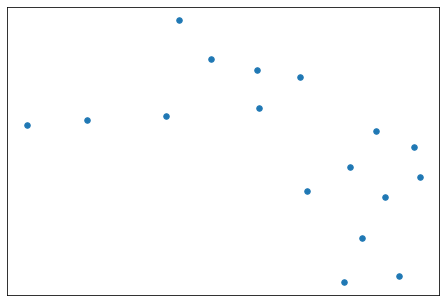

In [12]:
import networkx as ne
import matplotlib.pyplot as mp

BA = ne.barabasi_albert_graph(17,1)
ps = ne.spring_layout(BA)
ne.draw(BA,ps,with_labels=False,node_size=30)
mp.show()